### 딥-러닝 과정 Mulit Layer Perceptron(MLP) | 2020.02.26. 

## 세번째 실습. Keras 모델 생성/학습 - 당뇨병 예측 모델

In [1]:
# 1. Pandas 가져오기
!pip install pandas
import pandas as pd
print(pd.__version__)

1.0.1


In [2]:
# 2. 데이터 불러오기
data = pd.read_csv("diabetes_data.csv")
data.head()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   gloucose        768 non-null    int64  
 2   blood pressure  768 non-null    int64  
 3   skin thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   DPF             768 non-null    float64
 7   age             768 non-null    int64  
 8   result          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# 3. X/y 나누기
#X = data.loc[:,['pregnant', 'gloucose', 'blood pressure', 'skin thickness', 'insulin', 'BMI', 'DPF', 'age']]
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [6]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [7]:
# 4. Train set, Test set 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 9)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=5)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(537, 8)
(116, 8)
(115, 8)
(537,)
(116,)
(115,)


In [9]:
# 5. Keras 패키지 가져오기
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

print(keras.__version__)

Using TensorFlow backend.


2.3.1


In [10]:
# 6. MLP 모델 생성
model = Sequential()
model.add(Dense(16 , input_dim =8 , activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
#!pip install GraphViz
#!pip install pydot

#from keras.utils.vis_utils import plot_model
#plot_model(model, show_shapes = True, show_layer_names = True)

In [12]:
# 7. Compile - Optimizer, Loss function 설정
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# 8. 학습시키기
history = model.fit(X_train, y_train, batch_size=8, nb_epoch = 200, validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 537 samples, validate on 115 samples
Epoch 1/200
537/537 [==============================] - 0s 642us/step - loss: 0.8615 - accuracy: 0.5475 - val_loss: 0.8502 - val_accuracy: 0.5304
Epoch 2/200
537/537 [==============================] - 0s 185us/step - loss: 0.7354 - accuracy: 0.5642 - val_loss: 0.7623 - val_accuracy: 0.5043
Epoch 3/200
537/537 [==============================] - 0s 175us/step - loss: 0.6860 - accuracy: 0.5773 - val_loss: 0.7052 - val_accuracy: 0.5913
Epoch 4/200
537/537 [==============================] - 0s 233us/step - loss: 0.6337 - accuracy: 0.6667 - val_loss: 0.6928 - val_accuracy: 0.6348
Epoch 5/200
537/537 [==============================] - 0s 204us/step - loss: 0.6372 - accuracy: 0.7002 - val_loss: 0.6662 - val_accuracy: 0.6348
Epoch 6/200
537/537 [==============================] - 0s 204us/step - loss: 0.6172 - accuracy: 0.6611 - val_loss: 0.6934 - val_accuracy: 0.6261
Epoch 7/200
537/537 [==============================] - 0s 262us/step - loss: 0.6097 

Epoch 57/200
537/537 [==============================] - 0s 204us/step - loss: 0.5395 - accuracy: 0.7244 - val_loss: 0.6176 - val_accuracy: 0.6435
Epoch 58/200
537/537 [==============================] - 0s 175us/step - loss: 0.5174 - accuracy: 0.7412 - val_loss: 0.5919 - val_accuracy: 0.6957
Epoch 59/200
537/537 [==============================] - 0s 175us/step - loss: 0.5099 - accuracy: 0.7412 - val_loss: 0.6455 - val_accuracy: 0.6435
Epoch 60/200
537/537 [==============================] - 0s 175us/step - loss: 0.5077 - accuracy: 0.7523 - val_loss: 0.6386 - val_accuracy: 0.6522
Epoch 61/200
537/537 [==============================] - 0s 175us/step - loss: 0.5147 - accuracy: 0.7430 - val_loss: 0.5837 - val_accuracy: 0.7043
Epoch 62/200
537/537 [==============================] - 0s 175us/step - loss: 0.5099 - accuracy: 0.7523 - val_loss: 0.5996 - val_accuracy: 0.6783
Epoch 63/200
537/537 [==============================] - 0s 175us/step - loss: 0.5132 - accuracy: 0.7505 - val_loss: 0.6343 -

537/537 [==============================] - 0s 175us/step - loss: 0.4869 - accuracy: 0.7691 - val_loss: 0.6071 - val_accuracy: 0.6957
Epoch 114/200
537/537 [==============================] - 0s 175us/step - loss: 0.4825 - accuracy: 0.7635 - val_loss: 0.6194 - val_accuracy: 0.6783
Epoch 115/200
537/537 [==============================] - 0s 177us/step - loss: 0.4700 - accuracy: 0.7765 - val_loss: 0.6218 - val_accuracy: 0.6870
Epoch 116/200
537/537 [==============================] - 0s 174us/step - loss: 0.4808 - accuracy: 0.7616 - val_loss: 0.6217 - val_accuracy: 0.6783
Epoch 117/200
537/537 [==============================] - 0s 175us/step - loss: 0.4758 - accuracy: 0.7654 - val_loss: 0.6187 - val_accuracy: 0.7130
Epoch 118/200
537/537 [==============================] - ETA: 0s - loss: 0.4609 - accuracy: 0.76 - 0s 174us/step - loss: 0.4711 - accuracy: 0.7728 - val_loss: 0.6158 - val_accuracy: 0.6783
Epoch 119/200
537/537 [==============================] - 0s 175us/step - loss: 0.4893 - ac

537/537 [==============================] - 0s 175us/step - loss: 0.4627 - accuracy: 0.7765 - val_loss: 0.5952 - val_accuracy: 0.7043
Epoch 169/200
537/537 [==============================] - 0s 175us/step - loss: 0.4550 - accuracy: 0.7840 - val_loss: 0.6101 - val_accuracy: 0.7043
Epoch 170/200
537/537 [==============================] - 0s 175us/step - loss: 0.4546 - accuracy: 0.7914 - val_loss: 0.6342 - val_accuracy: 0.6870
Epoch 171/200
537/537 [==============================] - 0s 175us/step - loss: 0.4483 - accuracy: 0.7896 - val_loss: 0.6043 - val_accuracy: 0.7130
Epoch 172/200
537/537 [==============================] - 0s 175us/step - loss: 0.4499 - accuracy: 0.7933 - val_loss: 0.6667 - val_accuracy: 0.6609
Epoch 173/200
537/537 [==============================] - 0s 175us/step - loss: 0.4545 - accuracy: 0.7840 - val_loss: 0.6381 - val_accuracy: 0.6957
Epoch 174/200
537/537 [==============================] - 0s 175us/step - loss: 0.4473 - accuracy: 0.7877 - val_loss: 0.6140 - val_ac

In [14]:
# 9. 모델 평가하기
train_acc = model.evaluate(X_train, y_train)
test_acc = model.evaluate(X_test, y_test)

print('train_acc: ', train_acc)
print('test_acc: ', test_acc)

116/116 [==============================] - 0s 0us/step
train_acc:  [0.45681566510564564, 0.7858473062515259]
test_acc:  [0.5620745029942743, 0.7586206793785095]


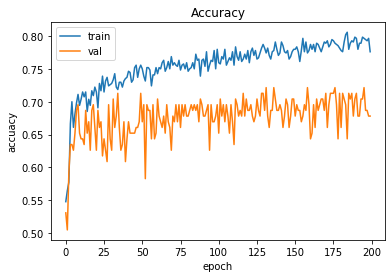

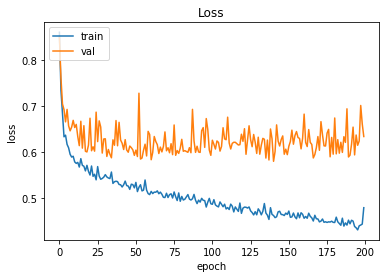

In [18]:
# 10. 학습 시각화하기
#!pip install matplotlib

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel('accuacy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()